# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 문서 유사도 측정

* 문서와 문서 간의 유사도 비교를 위해 유클리드 거리, 자카드 유사도 그리고 코사인 유사도 계산

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
d1 = "Think like a man of action and act like a man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death"

corpus = [d1, d2, d3]
print(corpus)

['Think like a man of action and act like a man of thought.', 'Try no to become a man of success but rather try to become a man of value.', 'Give me liberty, of give me death']


In [ ]:
import pandas as pd

vector = CountVectorizer(stop_words="english")
bow = vector.fit_transform(corpus)

columns = []
for k, v in sorted(vector.vocabulary_.items(), key=lambda item:item[1]):
  columns.append(k)

df = pd.DataFrame(bow.toarray(), columns=columns)
df

,act,action,death,liberty,like,man,success,think,thought,try,value
0,1,1,0,0,2,2,0,1,1,0,0
1,0,0,0,0,0,2,1,0,0,2,1
2,0,0,1,1,0,0,0,0,0,0,0


### 유클리드 거리(Euclidean distance)

* 다차원 공간에서 두개의 점 $p$와 $q$ 사이의 거리를 계산하는 방법

$$ \sqrt{\sum_{i=1}^{n}\left (q_i - p_i \right)^2} $$


In [ ]:
import numpy as np

def euclidean_distance(p, q):
  return np.sqrt(np.sum((q-p)**2))

In [ ]:
print(euclidean_distance(bow[0].toarray(), bow[1].toarray()))
print(euclidean_distance(bow[0].toarray(), bow[2].toarray()))
print(euclidean_distance(bow[1].toarray(), bow[2].toarray()))

3.7416573867739413
3.7416573867739413
3.4641016151377544


### 자카드 유사도(Jaccard Similarity)

* 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용

$$ jaccard(A, B)=\frac{\left | A\cap B \right |}{\left | A\cup B \right |}=\frac{\left | A\cap B \right |}{\left | A \left |+ \right | B \right | - \left | A\cap B \right |} $$


In [ ]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [ ]:
import nltk
nltk.download("omw-1.4")

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0.2222222222222222
0.06666666666666667
0.058823529411764705


### 코사인 유사도(Cosine Similarity)

* 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

$$ cosine(A, B)=\frac{A \cdot B}{\left \| A \right \| \left \| B \right \|}=\frac{\sum_{i=1}^{N}A_i\times B_i}{\sqrt{\sum_{i=1}^{N}\left (A_i \right)^2}\times \sqrt{\sum_{i=1}^{N}\left (B_i \right)^2}} $$

In [ ]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(corpus)

print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[1]))
print(cosine_similarity(tfidf_vectors[0], tfidf_vectors[2]))
print(cosine_similarity(tfidf_vectors[1], tfidf_vectors[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 군집화(Clustering)

* 리뷰 데이터 다운로드 (http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip

--2023-02-11 06:20:00--  http://archive.ics.uci.edu/ml/machine-learning-databases/opinion/OpinosisDataset1.0.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773840 (756K) [application/x-httpd-php]
Saving to: ‘OpinosisDataset1.0.zip.2’

OpinosisDataset1.0. 100%[===================>] 755.70K   809KB/s    in 0.9s    

2023-02-11 06:20:01 (809 KB/s) - ‘OpinosisDataset1.0.zip.2’ saved [773840/773840]



In [ ]:
!unzip OpinosisDataset1.0.zip

Archive:  OpinosisDataset1.0.zip
replace OpinosisDataset1.0/examples/prepare4rouge/input/summaries-base/accuracy_garmin_nuvi_255W_gps.baseline? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls OpinosisDataset1.0/topics

accuracy_garmin_nuvi_255W_gps.txt.data
bathroom_bestwestern_hotel_sfo.txt.data
battery-life_amazon_kindle.txt.data
battery-life_ipod_nano_8gb.txt.data
battery-life_netbook_1005ha.txt.data
buttons_amazon_kindle.txt.data
comfort_honda_accord_2008.txt.data
comfort_toyota_camry_2007.txt.data
directions_garmin_nuvi_255W_gps.txt.data
display_garmin_nuvi_255W_gps.txt.data
eyesight-issues_amazon_kindle.txt.data
features_windows7.txt.data
fonts_amazon_kindle.txt.data
food_holiday_inn_london.txt.data
food_swissotel_chicago.txt.data
free_bestwestern_hotel_sfo.txt.data
gas_mileage_toyota_camry_2007.txt.data
interior_honda_accord_2008.txt.data
interior_toyota_camry_2007.txt.data
keyboard_netbook_1005ha.txt.data
location_bestwestern_hotel_sfo.txt.data
location_holiday_inn_london.txt.data
mileage_honda_accord_2008.txt.data
navigation_amazon_kindle.txt.data
parking_bestwestern_hotel_sfo.txt.data
performance_honda_accord_2008.txt.data
performance_netbook_1005ha.txt.data
price_amazon_kindle.txt.data
pri

In [ ]:
import pandas as pd
import glob, os

path = r"./OpinosisDataset1.0/topics/"
files = glob.glob(os.path.join(path, "*.data"))
filenames = []
opinions = []

for file_ in files:
  filename = file_.split("/")[-1]
  filename = filename.split(".")[0]
  filenames.append(filename)

  df = pd.read_table(file_, index_col=None, header=0, encoding="latin1")
  opinions.append(df.to_string())

opinion_df = pd.DataFrame({"filename":filenames, "opinion":opinions})
opinion_df

,filename,opinion
0,rooms_swissotel_chicago,...
1,service_bestwestern_hotel_sfo,...
2,interior_toyota_camry_2007,...
3,interior_honda_accord_2008,...
4,comfort_toyota_camry_2007,...
5,quality_toyota_camry_2007,...
6,seats_honda_accord_2008,...
7,screen_garmin_nuvi_255W_gps,...
8,navigation_amazon_kindle,...
9,staff_swissotel_chicago,...


In [ ]:
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), min_df=0.05, max_df=0.85)

tfidf_vectors = tfidf.fit_transform(opinion_df["opinion"])
feature_names = tfidf.get_feature_names_out()
print(feature_names)

['00' '000' '000 miles' ... 'yes rooms' 'yields' 'zoom']


### DBSCAN 알고리즘

* 밀도 기반의 군집화 알고리즘
* 특정 벡터부터 시작해 반경내 기준치 만큼의 점들이 존재한다면 군집화 하는 방식
* 일정 밀도 이상의 데이터를 기준으로 군집을 형성하기 때문에 노이즈 처리에 용이
* 이미 형성된 군집 기준으로 기준점을 옮겨가며 처리하기 때문에 분포가 이상한 데이터에도 강건함
* K-means에 비해 속도가 느리고, 파라미터 값인 epsilon, min_sampels 값에 영향을 많이 받음

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=3, metric="cosine")
dbscan_label = dbscan.fit_predict(tfidf_vectors)
print(dbscan_label)

[ 0  0  1  1  1 -1  1  2 -1 -1 -1  2  0 -1 -1 -1  1  0  3 -1  2  0  3  2
 -1 -1  0  3 -1 -1  0  2  0  0  2  3 -1  0  2  0 -1  2 -1  2  0 -1 -1  0
 -1  3 -1]


In [ ]:
opinion_df["cluster"] = dbscan_label
opinion_df

,filename,opinion,cluster
0,rooms_swissotel_chicago,...,0
1,service_bestwestern_hotel_sfo,...,0
2,interior_toyota_camry_2007,...,1
3,interior_honda_accord_2008,...,1
4,comfort_toyota_camry_2007,...,1
5,quality_toyota_camry_2007,...,-1
6,seats_honda_accord_2008,...,1
7,screen_garmin_nuvi_255W_gps,...,2
8,navigation_amazon_kindle,...,-1
9,staff_swissotel_chicago,...,-1


In [ ]:
for cluster_num in set(dbscan_label):
  print("Cluster: {}".format(cluster_num))
  df = opinion_df[opinion_df["cluster"] == cluster_num]
  for filename in df["filename"]:
    print(filename)
  print()

Cluster: 0
rooms_swissotel_chicago
service_bestwestern_hotel_sfo
location_bestwestern_hotel_sfo
location_holiday_inn_london
food_swissotel_chicago
service_holiday_inn_london
service_swissotel_hotel_chicago
food_holiday_inn_london
rooms_bestwestern_hotel_sfo
room_holiday_inn_london
price_amazon_kindle
bathroom_bestwestern_hotel_sfo
price_holiday_inn_london

Cluster: 1
interior_toyota_camry_2007
interior_honda_accord_2008
comfort_toyota_camry_2007
seats_honda_accord_2008
comfort_honda_accord_2008

Cluster: 2
screen_garmin_nuvi_255W_gps
display_garmin_nuvi_255W_gps
speed_garmin_nuvi_255W_gps
keyboard_netbook_1005ha
screen_ipod_nano_8gb
voice_garmin_nuvi_255W_gps
size_asus_netbook_1005ha
video_ipod_nano_8gb
screen_netbook_1005ha

Cluster: 3
battery-life_ipod_nano_8gb
battery-life_netbook_1005ha
performance_netbook_1005ha
performance_honda_accord_2008
battery-life_amazon_kindle

Cluster: -1
quality_toyota_camry_2007
navigation_amazon_kindle
staff_swissotel_chicago
staff_bestwestern_hotel_sf

### K-means 알고리즘

* 대표적인 군집화 알고리즘
* 클러스터 수 k를 직접 지정해야 함
* 각 군집내 평균 벡터와 해당 군집에 속한 벡터간의 거리 제곱의 합이 최소가 되는 군집을 찾는 방법
* 노이즈 데이터에 취약하고, 중심점(centroid)을 임의로 잡기 때문에 군집 결과가 상이하거나 나쁠수 있음

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=42)
kmeans_label = kmeans.fit_predict(tfidf_vectors)
kmeans_centers = kmeans.cluster_centers_

print(kmeans_label)
pd.DataFrame(kmeans_centers)

[0 0 2 2 2 2 2 1 1 0 0 1 0 2 2 1 2 0 1 1 1 0 1 1 1 2 0 1 1 1 0 1 0 0 1 2 1
 0 1 1 2 1 0 1 0 0 1 0 1 1 1]


,0,1,2,3,4,5,6,7,8,9,...,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399
0,0.004467,0.00000,0.000000,0.000000,0.000195,0.000000,0.000000,0.000857,0.001729,0.00000,...,0.001365,0.001024,0.002556,0.000865,0.000700,0.000951,0.003261,0.001657,0.000000,0.000000
1,0.000562,0.00000,0.000000,0.000000,0.000000,0.000574,0.000000,0.000000,0.000000,0.00331,...,0.005947,0.003637,0.004353,0.002542,0.001848,0.000000,0.003099,0.000000,0.000429,0.007645
2,0.002586,0.00651,0.004418,0.003065,0.002956,0.003881,0.006367,0.000000,0.000000,0.00000,...,0.003748,0.002281,0.007364,0.000000,0.000000,0.002163,0.001715,0.000000,0.002658,0.000000


In [ ]:
opinion_df["cluster"] = kmeans_label
opinion_df

,filename,opinion,cluster
0,rooms_swissotel_chicago,...,0
1,service_bestwestern_hotel_sfo,...,0
2,interior_toyota_camry_2007,...,2
3,interior_honda_accord_2008,...,2
4,comfort_toyota_camry_2007,...,2
5,quality_toyota_camry_2007,...,2
6,seats_honda_accord_2008,...,2
7,screen_garmin_nuvi_255W_gps,...,1
8,navigation_amazon_kindle,...,1
9,staff_swissotel_chicago,...,0


In [ ]:
for cluster_num in set(kmeans_label):
  print("Cluster: {}".format(cluster_num))
  df = opinion_df[opinion_df["cluster"] == cluster_num]
  for filename in df["filename"]:
    print(filename)
  print()

Cluster: 0
rooms_swissotel_chicago
service_bestwestern_hotel_sfo
staff_swissotel_chicago
staff_bestwestern_hotel_sfo
location_bestwestern_hotel_sfo
location_holiday_inn_london
food_swissotel_chicago
service_holiday_inn_london
service_swissotel_hotel_chicago
food_holiday_inn_london
rooms_bestwestern_hotel_sfo
room_holiday_inn_london
free_bestwestern_hotel_sfo
bathroom_bestwestern_hotel_sfo
parking_bestwestern_hotel_sfo
price_holiday_inn_london

Cluster: 1
screen_garmin_nuvi_255W_gps
navigation_amazon_kindle
display_garmin_nuvi_255W_gps
accuracy_garmin_nuvi_255W_gps
battery-life_ipod_nano_8gb
speed_windows7
speed_garmin_nuvi_255W_gps
battery-life_netbook_1005ha
keyboard_netbook_1005ha
sound_ipod_nano_8gb
performance_netbook_1005ha
buttons_amazon_kindle
directions_garmin_nuvi_255W_gps
screen_ipod_nano_8gb
voice_garmin_nuvi_255W_gps
satellite_garmin_nuvi_255W_gps
size_asus_netbook_1005ha
price_amazon_kindle
video_ipod_nano_8gb
screen_netbook_1005ha
fonts_amazon_kindle
updates_garmin_nuvi_2

In [ ]:
centroid_feature = kmeans_centers.argsort()[:, ::-1]

for cluster_num in set(kmeans_label):
  print("Cluster: {}".format(cluster_num))

  df = opinion_df[opinion_df["cluster"] == cluster_num]
  print(df["filename"].tolist())

  top_feature_indexes = centroid_feature[cluster_num, :10]
  top_features = [feature_names[i] for i in top_feature_indexes]
  print(top_features)

  top_feature_values = kmeans_centers[cluster_num, top_feature_indexes].tolist()
  print(top_feature_values)
  print()

Cluster: 0
['rooms_swissotel_chicago', 'service_bestwestern_hotel_sfo', 'staff_swissotel_chicago', 'staff_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'food_swissotel_chicago', 'service_holiday_inn_london', 'service_swissotel_hotel_chicago', 'food_holiday_inn_london', 'rooms_bestwestern_hotel_sfo', 'room_holiday_inn_london', 'free_bestwestern_hotel_sfo', 'bathroom_bestwestern_hotel_sfo', 'parking_bestwestern_hotel_sfo', 'price_holiday_inn_london']
['hotel', 'service', 'rooms', 'staff', 'room', 'food', 'location', 'clean', 'bathroom', 'parking']
[0.18594575243038405, 0.18328248541586759, 0.16375847485211503, 0.1520900863593712, 0.14726753094949235, 0.12972287464448048, 0.12743016012771913, 0.07191823429740761, 0.06973548911159089, 0.06000673271289654]

Cluster: 1
['screen_garmin_nuvi_255W_gps', 'navigation_amazon_kindle', 'display_garmin_nuvi_255W_gps', 'accuracy_garmin_nuvi_255W_gps', 'battery-life_ipod_nano_8gb', 'speed_windows7', 'speed_gar

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_vectors.toarray())
opinion_df["x0"] = pca_vecs[:, 0]
opinion_df["x1"] = pca_vecs[:, 1]

cluster_map = {0:"Electronics devices", 1:"Accommodation", 2:"Car"}
opinion_df["cluster"] = opinion_df["cluster"].map(cluster_map)
opinion_df

,filename,opinion,cluster,x0,x1
0,rooms_swissotel_chicago,...,Electronics devices,0.365495,-0.048740
1,service_bestwestern_hotel_sfo,...,Electronics devices,0.622753,-0.148573
2,interior_toyota_camry_2007,...,Car,-0.106609,0.495226
3,interior_honda_accord_2008,...,Car,-0.106059,0.513377
4,comfort_toyota_camry_2007,...,Car,-0.099013,0.630955
5,quality_toyota_camry_2007,...,Car,-0.087339,0.306405
6,seats_honda_accord_2008,...,Car,-0.078408,0.411195
7,screen_garmin_nuvi_255W_gps,...,Accommodation,-0.327505,-0.234612
8,navigation_amazon_kindle,...,Accommodation,-0.170205,-0.082178
9,staff_swissotel_chicago,...,Electronics devices,0.386544,-0.081549


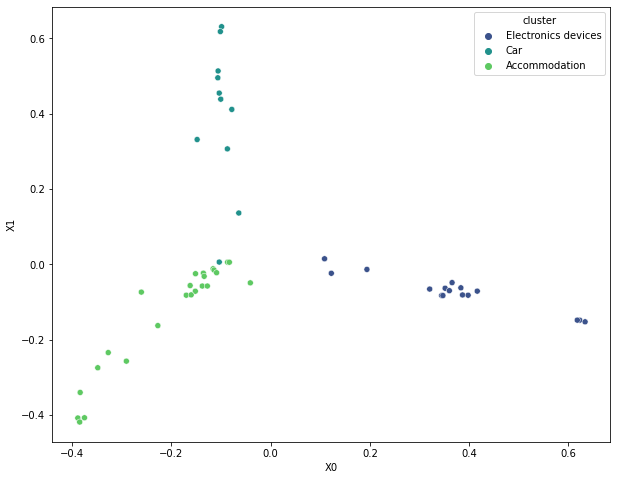

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.xlabel("X0")
plt.ylabel("X1")
sns.scatterplot(data=opinion_df, x="x0", y="x1", hue="cluster", palette="viridis")
plt.show()

### 리뷰 문서 유사도 측정

In [ ]:
opinion_df

,filename,opinion,cluster,x0,x1
0,rooms_swissotel_chicago,...,Electronics devices,0.365495,-0.048740
1,service_bestwestern_hotel_sfo,...,Electronics devices,0.622753,-0.148573
2,interior_toyota_camry_2007,...,Car,-0.106609,0.495226
3,interior_honda_accord_2008,...,Car,-0.106059,0.513377
4,comfort_toyota_camry_2007,...,Car,-0.099013,0.630955
5,quality_toyota_camry_2007,...,Car,-0.087339,0.306405
6,seats_honda_accord_2008,...,Car,-0.078408,0.411195
7,screen_garmin_nuvi_255W_gps,...,Accommodation,-0.327505,-0.234612
8,navigation_amazon_kindle,...,Accommodation,-0.170205,-0.082178
9,staff_swissotel_chicago,...,Electronics devices,0.386544,-0.081549


In [ ]:
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), min_df=0.05, max_df=0.85)
tfidf_vectors = tfidf.fit_transform(opinion_df["opinion"])

word_id_list  = sorted(tfidf.vocabulary_.items(), key=lambda x: x[1], reverse=False)
word_list = [x[0] for x in word_id_list]

tf_idf_df = pd.DataFrame(tfidf_vectors.toarray(),
                         columns=word_list,
                         index=opinion_df["filename"])
tf_idf_df

,00,000,000 miles,05,06,07,08,10 did,10 great,10 inch,...,year,year old,years,years ago,years old,yellow,yes,yes rooms,yields,zoom
filename,,,,,,,,,,,,,,,,,,,,,
rooms_swissotel_chicago,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004616,0.000000,0.000000,0.000000,0.005671,0.000000,0.000000,0.000000
service_bestwestern_hotel_sfo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011953,0.000000,...,0.000000,0.000000,0.017836,0.000000,0.011205,0.000000,0.000000,0.000000,0.000000,0.000000
interior_toyota_camry_2007,0.000000,0.010542,0.011150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023789,0.000000,0.000000,0.011895,0.000000
interior_honda_accord_2008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012685,0.000000,0.000000,0.000000,...,0.007423,0.009362,0.000000,0.000000,0.000000,0.000000,0.008270,0.000000,0.000000,0.000000
comfort_toyota_camry_2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.025884,0.000000,0.000000,0.000000,0.010601,0.000000,0.017346,0.000000
quality_toyota_camry_2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.021317,0.000000,0.000000,0.000000,0.000000,...,0.012474,0.015732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
seats_honda_accord_2008,0.000000,0.012479,0.013199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
screen_garmin_nuvi_255W_gps,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039177
navigation_amazon_kindle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
cos_sim_df = pd.DataFrame(cosine_similarity(tf_idf_df, tf_idf_df),
                          columns=opinion_df["filename"],
                          index=opinion_df["filename"])
cos_sim_df

filename,rooms_swissotel_chicago,service_bestwestern_hotel_sfo,interior_toyota_camry_2007,interior_honda_accord_2008,comfort_toyota_camry_2007,quality_toyota_camry_2007,seats_honda_accord_2008,screen_garmin_nuvi_255W_gps,navigation_amazon_kindle,staff_swissotel_chicago,...,video_ipod_nano_8gb,free_bestwestern_hotel_sfo,screen_netbook_1005ha,bathroom_bestwestern_hotel_sfo,parking_bestwestern_hotel_sfo,fonts_amazon_kindle,price_holiday_inn_london,updates_garmin_nuvi_255W_gps,battery-life_amazon_kindle,eyesight-issues_amazon_kindle
filename,,,,,,,,,,,,,,,,,,,,,
rooms_swissotel_chicago,1.000000,0.208982,0.021887,0.023080,0.052076,0.017566,0.015233,0.012974,0.011056,0.157982,...,0.010246,0.054602,0.014704,0.193783,0.069384,0.006547,0.122553,0.011897,0.008722,0.010403
service_bestwestern_hotel_sfo,0.208982,1.000000,0.012068,0.017617,0.037243,0.018171,0.028023,0.014433,0.011324,0.273863,...,0.007680,0.143778,0.015718,0.106747,0.160579,0.015305,0.212849,0.015594,0.012602,0.011366
interior_toyota_camry_2007,0.021887,0.012068,1.000000,0.927009,0.273905,0.202927,0.105051,0.015629,0.023399,0.009168,...,0.015098,0.005969,0.018278,0.015684,0.015062,0.007325,0.013460,0.010194,0.009837,0.014154
interior_honda_accord_2008,0.023080,0.017617,0.927009,1.000000,0.290231,0.179001,0.166365,0.024197,0.015744,0.010177,...,0.015818,0.005943,0.021805,0.020052,0.015832,0.010757,0.013830,0.007603,0.011734,0.015615
comfort_toyota_camry_2007,0.052076,0.037243,0.273905,0.290231,1.000000,0.220592,0.434736,0.025379,0.024817,0.023403,...,0.015133,0.012136,0.031527,0.050415,0.041578,0.011551,0.058921,0.015415,0.015120,0.022685
quality_toyota_camry_2007,0.017566,0.018171,0.202927,0.179001,0.220592,1.000000,0.086854,0.012895,0.017566,0.009470,...,0.054100,0.006574,0.018462,0.005850,0.021452,0.007368,0.031378,0.006284,0.007336,0.010960
seats_honda_accord_2008,0.015233,0.028023,0.105051,0.166365,0.434736,0.086854,1.000000,0.013333,0.010772,0.008649,...,0.010673,0.005732,0.017518,0.017295,0.010448,0.007146,0.015590,0.009977,0.010486,0.008283
screen_garmin_nuvi_255W_gps,0.012974,0.014433,0.015629,0.024197,0.025379,0.012895,0.013333,1.000000,0.130045,0.008822,...,0.046433,0.013596,0.731232,0.010472,0.017365,0.081732,0.017698,0.179234,0.048733,0.152143
navigation_amazon_kindle,0.011056,0.011324,0.023399,0.015744,0.024817,0.017566,0.010772,0.130045,1.000000,0.009276,...,0.031704,0.031466,0.129727,0.009874,0.010111,0.159448,0.010612,0.053109,0.127132,0.224243


In [ ]:
hotel_indexes = opinion_df[opinion_df["cluster"] == "Accommodation"].index
print(hotel_indexes)

hotel_file_name = opinion_df.iloc[hotel_indexes[0]]["filename"]
print(hotel_file_name)

similarity = cosine_similarity(tfidf_vectors[hotel_indexes[0]], tfidf_vectors[hotel_indexes])
print(similarity)

Int64Index([ 7,  8, 11, 15, 18, 19, 20, 22, 23, 24, 27, 28, 29, 31, 34, 36, 38,
            39, 41, 43, 46, 48, 49, 50],
           dtype='int64')
screen_garmin_nuvi_255W_gps
[[1.         0.13004511 0.31330233 0.13970609 0.03858756 0.02630157
  0.26832105 0.0396118  0.12859984 0.03953731 0.03786311 0.10264008
  0.22959286 0.60927246 0.30502166 0.10813643 0.21800747 0.02426058
  0.04643255 0.73123231 0.0817318  0.17923391 0.04873266 0.15214333]]


In [ ]:
sorted_index = similarity.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]
print(sorted_index)

hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]
print(hotel_sorted_indexes)

hotel_1_similarity = np.sqrt(similarity.reshape(-1))[::-1]
hotel_1_similarity = hotel_1_similarity[1:]
print(hotel_1_similarity)

[[19 13  2 14  6 12 16 21 23  3  1  8 15 11 20 22 18  7  9  4 10  5 17]]
Int64Index([43, 31, 11, 34, 20, 29, 38, 48, 50, 15,  8, 23, 36, 28, 46, 49, 41,
            22, 24, 18, 27, 19, 39],
           dtype='int64')
[0.22075476 0.42336027 0.28588774 0.85512123 0.21548213 0.15575807
 0.4669127  0.32884104 0.55228766 0.78055907 0.47915849 0.32037491
 0.19458446 0.19883991 0.35860819 0.19902714 0.51799715 0.1621776
 0.19643717 0.37377278 0.55973416 0.36061768 1.        ]


In [ ]:
df = pd.DataFrame({"similarity": hotel_1_similarity},
                  index=opinion_df.iloc[hotel_sorted_indexes]["filename"])
df

,similarity
filename,
screen_netbook_1005ha,0.220755
screen_ipod_nano_8gb,0.423360
display_garmin_nuvi_255W_gps,0.285888
voice_garmin_nuvi_255W_gps,0.855121
speed_garmin_nuvi_255W_gps,0.215482
directions_garmin_nuvi_255W_gps,0.155758
size_asus_netbook_1005ha,0.466913
updates_garmin_nuvi_255W_gps,0.328841
eyesight-issues_amazon_kindle,0.552288


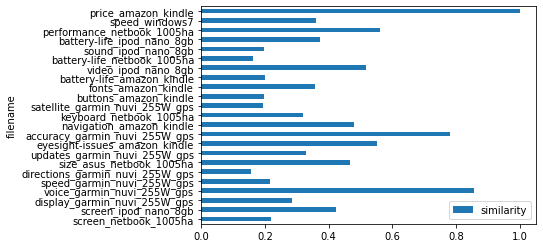

In [ ]:
df.plot.barh();

## 계층적 군집화(Hierarchical Clustering)

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### 병합 군집화(Agglomerative Clustering)

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지(ward, average, complete)를 지정 가능

`ward`: 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3, linkage="ward")
predict = ward.fit_predict(tfidf_vectors.toarray())
predict

array([1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0])

In [ ]:
results = opinion_df
results["predict"] = predict
results[:10]

,filename,opinion,cluster,x0,x1,predict
0,rooms_swissotel_chicago,...,Electronics devices,0.365495,-0.048740,1
1,service_bestwestern_hotel_sfo,...,Electronics devices,0.622753,-0.148573,1
2,interior_toyota_camry_2007,...,Car,-0.106609,0.495226,2
3,interior_honda_accord_2008,...,Car,-0.106059,0.513377,2
4,comfort_toyota_camry_2007,...,Car,-0.099013,0.630955,2
5,quality_toyota_camry_2007,...,Car,-0.087339,0.306405,0
6,seats_honda_accord_2008,...,Car,-0.078408,0.411195,2
7,screen_garmin_nuvi_255W_gps,...,Accommodation,-0.327505,-0.234612,0
8,navigation_amazon_kindle,...,Accommodation,-0.170205,-0.082178,0
9,staff_swissotel_chicago,...,Electronics devices,0.386544,-0.081549,1


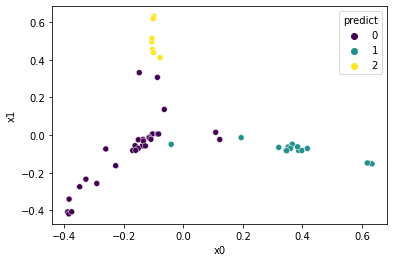

In [ ]:
sns.scatterplot(x="x0", y="x1", data=results, hue="predict", palette="viridis");

`average`: 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침

In [ ]:
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
predict = avg.fit_predict(tfidf_vectors.toarray())
predict

array([1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0])

In [ ]:
results = opinion_df
results["predict"] = predict
results[:10]

,filename,opinion,cluster,x0,x1,predict
0,rooms_swissotel_chicago,...,Electronics devices,0.365495,-0.048740,1
1,service_bestwestern_hotel_sfo,...,Electronics devices,0.622753,-0.148573,1
2,interior_toyota_camry_2007,...,Car,-0.106609,0.495226,2
3,interior_honda_accord_2008,...,Car,-0.106059,0.513377,2
4,comfort_toyota_camry_2007,...,Car,-0.099013,0.630955,2
5,quality_toyota_camry_2007,...,Car,-0.087339,0.306405,2
6,seats_honda_accord_2008,...,Car,-0.078408,0.411195,2
7,screen_garmin_nuvi_255W_gps,...,Accommodation,-0.327505,-0.234612,0
8,navigation_amazon_kindle,...,Accommodation,-0.170205,-0.082178,0
9,staff_swissotel_chicago,...,Electronics devices,0.386544,-0.081549,1


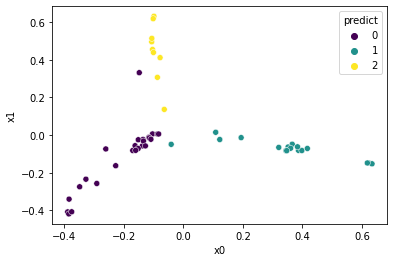

In [ ]:
sns.scatterplot(x="x0", y="x1", data=results, hue="predict", palette="viridis");

`complete`: 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

In [ ]:
compl = AgglomerativeClustering(n_clusters=3, linkage="complete")
predict = compl.fit_predict(tfidf_vectors.toarray())
predict

array([2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 0])

In [ ]:
results = opinion_df
results["predict"] = predict
results[:10]

,filename,opinion,cluster,x0,x1,predict
0,rooms_swissotel_chicago,...,Electronics devices,0.365495,-0.048740,2
1,service_bestwestern_hotel_sfo,...,Electronics devices,0.622753,-0.148573,2
2,interior_toyota_camry_2007,...,Car,-0.106609,0.495226,1
3,interior_honda_accord_2008,...,Car,-0.106059,0.513377,1
4,comfort_toyota_camry_2007,...,Car,-0.099013,0.630955,1
5,quality_toyota_camry_2007,...,Car,-0.087339,0.306405,1
6,seats_honda_accord_2008,...,Car,-0.078408,0.411195,1
7,screen_garmin_nuvi_255W_gps,...,Accommodation,-0.327505,-0.234612,0
8,navigation_amazon_kindle,...,Accommodation,-0.170205,-0.082178,0
9,staff_swissotel_chicago,...,Electronics devices,0.386544,-0.081549,2


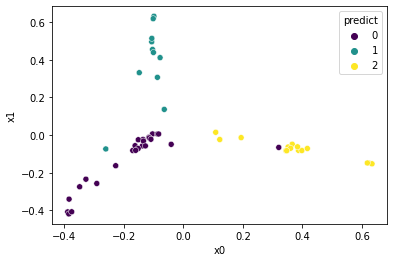

In [ ]:
sns.scatterplot(x="x0", y="x1", data=results, hue="predict", palette="viridis");

### 덴드로그램(Dendrogram)

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(tfidf_vectors.toarray(), metric="euclidean")
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000000,1.257790,1.398651,1.397798,1.376898,1.401737,1.403401,1.405009,1.406374,1.297704,...,1.406950,1.375062,1.403778,1.269817,1.364270,1.409577,1.324724,1.405776,1.408033,1.406838
1,1.257790,0.000000,1.405655,1.401701,1.387629,1.401306,1.394258,1.403971,1.406184,1.205103,...,1.408772,1.308604,1.403056,1.336602,1.295702,1.403350,1.254712,1.403144,1.405275,1.406154
2,1.398651,1.405655,0.000000,0.382076,1.205068,1.262595,1.337871,1.403119,1.397570,1.407716,...,1.403497,1.409987,1.401229,1.403079,1.403522,1.409024,1.404664,1.406987,1.407240,1.404169
3,1.397798,1.401701,0.382076,0.000000,1.191443,1.281405,1.291228,1.396999,1.403037,1.406999,...,1.402984,1.410005,1.398710,1.399963,1.402974,1.406587,1.404401,1.408827,1.405892,1.403129
4,1.376898,1.387629,1.205068,1.191443,0.000000,1.248525,1.063263,1.396153,1.396555,1.397567,...,1.403472,1.405606,1.391742,1.378104,1.384501,1.406022,1.371918,1.403271,1.403482,1.398081
5,1.401737,1.401306,1.262595,1.281405,1.248525,0.000000,1.351403,1.405066,1.401737,1.407501,...,1.375427,1.409558,1.401098,1.410071,1.398962,1.408994,1.391849,1.409763,1.409016,1.406442
6,1.403401,1.394258,1.337871,1.291228,1.063263,1.351403,0.000000,1.404754,1.406576,1.408084,...,1.406646,1.410154,1.401772,1.401931,1.406806,1.409151,1.403146,1.407141,1.406779,1.408345
7,1.405009,1.403971,1.403119,1.396999,1.396153,1.405066,1.404754,0.000000,1.319056,1.407961,...,1.380991,1.404567,0.733168,1.406789,1.401881,1.355189,1.401643,1.281223,1.379324,1.302196
8,1.406374,1.406184,1.397570,1.403037,1.396555,1.401737,1.406576,1.319056,0.000000,1.407639,...,1.391615,1.391786,1.319297,1.407214,1.407046,1.296574,1.406690,1.376147,1.321263,1.245598
9,1.297704,1.205103,1.407716,1.406999,1.397567,1.407501,1.408084,1.407961,1.407639,0.000000,...,1.409737,1.361049,1.406552,1.364601,1.371473,1.409838,1.312836,1.409640,1.409930,1.407586


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

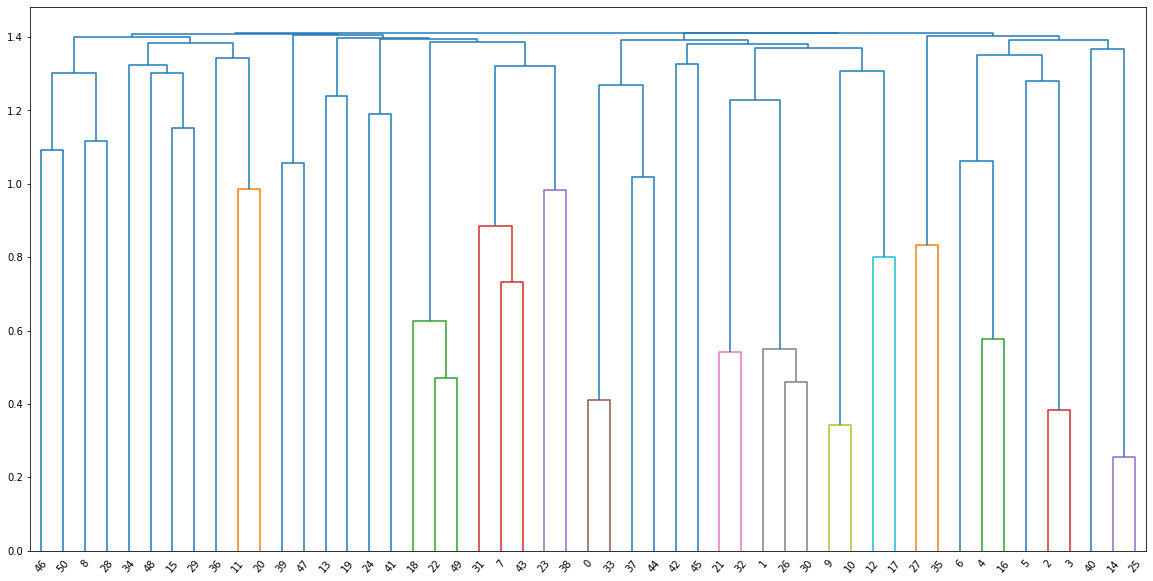

In [ ]:
row_clusters = linkage(distmatrix, method="complete")

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=10)
plt.show()

* 각 단어간 코사인 유사도를 이용한 군집 분석 및 덴드로그램 시각화

In [ ]:
distmatrix = pdist(tfidf_vectors.toarray(), metric="cosine")
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000000,0.791018,0.978113,0.976920,0.947924,0.982434,0.984767,0.987026,0.988944,0.842018,...,0.989754,0.945398,0.985296,0.806217,0.930616,0.993453,0.877447,0.988103,0.991278,0.989597
1,0.791018,0.000000,0.987932,0.982383,0.962757,0.981829,0.971977,0.985567,0.988676,0.726137,...,0.992320,0.856222,0.984282,0.893253,0.839421,0.984695,0.787151,0.984406,0.987398,0.988634
2,0.978113,0.987932,0.000000,0.072991,0.726095,0.797073,0.894949,0.984371,0.976601,0.990832,...,0.984902,0.994031,0.981722,0.984316,0.984938,0.992675,0.986540,0.989806,0.990163,0.985846
3,0.976920,0.982383,0.072991,0.000000,0.709769,0.820999,0.833635,0.975803,0.984256,0.989823,...,0.984182,0.994057,0.978195,0.979948,0.984168,0.989243,0.986170,0.992397,0.988266,0.984385
4,0.947924,0.962757,0.726095,0.709769,0.000000,0.779408,0.565264,0.974621,0.975183,0.976597,...,0.984867,0.987864,0.968473,0.949585,0.958422,0.988449,0.941079,0.984585,0.984880,0.977315
5,0.982434,0.981829,0.797073,0.820999,0.779408,0.000000,0.913146,0.987105,0.982434,0.990530,...,0.945900,0.993426,0.981538,0.994150,0.978548,0.992632,0.968622,0.993716,0.992664,0.989040
6,0.984767,0.971977,0.894949,0.833635,0.565264,0.913146,0.000000,0.986667,0.989228,0.991351,...,0.989327,0.994268,0.982482,0.982705,0.989552,0.992854,0.984410,0.990023,0.989514,0.991717
7,0.987026,0.985567,0.984371,0.975803,0.974621,0.987105,0.986667,0.000000,0.869955,0.991178,...,0.953567,0.986404,0.268768,0.989528,0.982635,0.918268,0.982302,0.820766,0.951267,0.847857
8,0.988944,0.988676,0.976601,0.984256,0.975183,0.982434,0.989228,0.869955,0.000000,0.990724,...,0.968296,0.968534,0.870273,0.990126,0.989889,0.840552,0.989388,0.946891,0.872868,0.775757
9,0.842018,0.726137,0.990832,0.989823,0.976597,0.990530,0.991351,0.991178,0.990724,0.000000,...,0.993679,0.926227,0.989194,0.931068,0.940469,0.993821,0.861769,0.993542,0.993951,0.990649


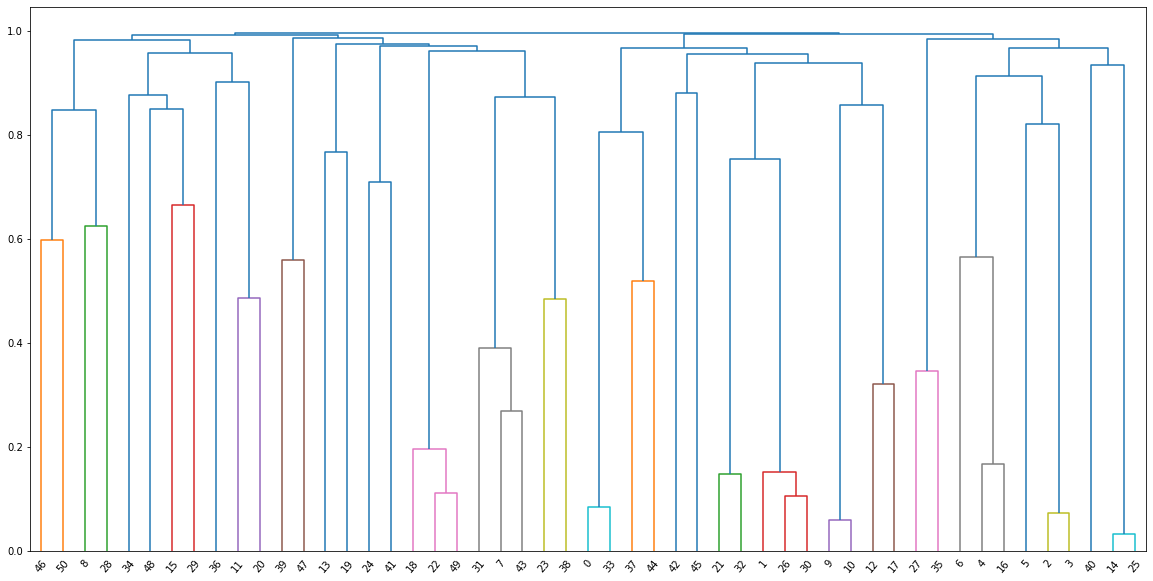

In [ ]:
row_clusters = linkage(distmatrix, method="complete")

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=10)
plt.show()

## 뉴스그룹 군집 분석

### 데이터 로드 및 전처리

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="train", shuffle=True, remove=("headers", "footers", "quotes"))
df = pd.DataFrame(news.data, columns=["corpus"])
df

,corpus
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to..."
...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310,"I have a (very old) Mac 512k and a Mac Plus, b..."
11311,I just installed a DX2-66 CPU in a clone mothe...
11312,\nWouldn't this require a hyper-sphere. In 3-...


In [ ]:
import re
from nltk.corpus import stopwords
nltk.download("stopwords")

def preprocess_text(text):
  text = re.sub(r"http\S+", "", text)
  text = re.sub("[^A-Za-z]+", " ", text)

  tokens = nltk.word_tokenize(text)
  tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
  text = " ".join(tokens)
  text = text.lower().strip()

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["cleaned"] = df["corpus"].apply(preprocess_text)

### K-means 군집화

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df["cleaned"])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
KMeans.fit(X)

clusters = kmeans.labels_
df["cluster"] = clusters

TypeError: ignored

In [ ]:
pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(X.toarray())

df["x0"] = pca_vecs[:, 0]
df["x1"] = pca_vecs[:, 1]

In [ ]:
sns.scatterplot(data=df, x="x0", y="x1", hue="cluster");

In [ ]:
terms_df = pd.DataFrame(X.todense()).groupby(clusters).mean())
terms = vectorizer.get_feature_names_out()
for i, r in terms_df.iterrows():
  print("cluster: {}".format())
  print(".".join([terms[t] for t in np.argsort(r)[-10:]]))

### 병합 군집화

In [ ]:
ward = AgglomerativeClustering(n_clusters=3,linkage="ward")
predict = ward.fit_predict(X.toarray())
predict

In [ ]:
results = df
results["predict"] = predict
results[:10]

In [ ]:
sns.scatterplot(data=results, x="x0", y="x1", hue="predict");